In [1]:
import cv2
import pytesseract #ocr
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
page21 = cv2.imread("page21.jpg") #on lit les pages avec ocv
page127 = cv2.imread("page127.jpg")
page589 = cv2.imread("page589.jpg")
page568 = cv2.imread("image-0568.png")
page70 = cv2.imread("image-0070.png")
#h,l,L = page21.shape
#print(h,l)

In [ ]:
page = page589.copy()
gray = cv2.cvtColor(page, cv2.COLOR_BGR2GRAY) # on la passe en niveaux de gris
flou = cv2.blur(gray,(10, 10), 3) #on floute pour que les paragraphes soient plus facilement repérables
thresh = cv2.adaptiveThreshold(flou, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2) #on affine les contours pour les rendre plus "différents" et visibles

kerneldil = cv2.getStructuringElement(cv2.MORPH_RECT, (7,6)) #paramètres de kernel pour la dilatation
kernelero = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1)) #paramètre de kernel pour l'érosion

morph = cv2.erode(thresh, kernelero, iterations = 1 ) # on fait une érosion : autour de chaque pixel non entouré on supprime des pixels autour
morph2 = cv2.dilate(morph, kerneldil, iterations=1) #on fait une dilatation : autour de chaque pixel on rajoute des pixels

contours, hierarchy = cv2.findContours(morph2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #on trouve les contours dans une (1) image

print(len(contours))
contours_filtrés = [] #on crée une liste avec les contours suffisamment grand
nbr_contours_f = 0
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt) #on récupère les positions des coins du contours
    if w > 300 and h > 50: #si trop petit (pas assez large ni haut) on l'enlève
        cv2.rectangle(page, (x, y), (x + w, y + h), (0, 255, 0), 2) #on ajoute le contours vert à la page
        nbr_contours_f +=1
        contours_filtrés.append(cnt)
print(nbr_contours_f)
contours_filtrés[0]
x, y, w, h = cv2.boundingRect(contours_filtrés[-1])      # cnt = un contour, on affiche un seul contour
roi = page[y:y+h, x:x+w] # on extrait que la partie dans le contours voulu



1742
10


<Figure size 640x480 with 0 Axes>

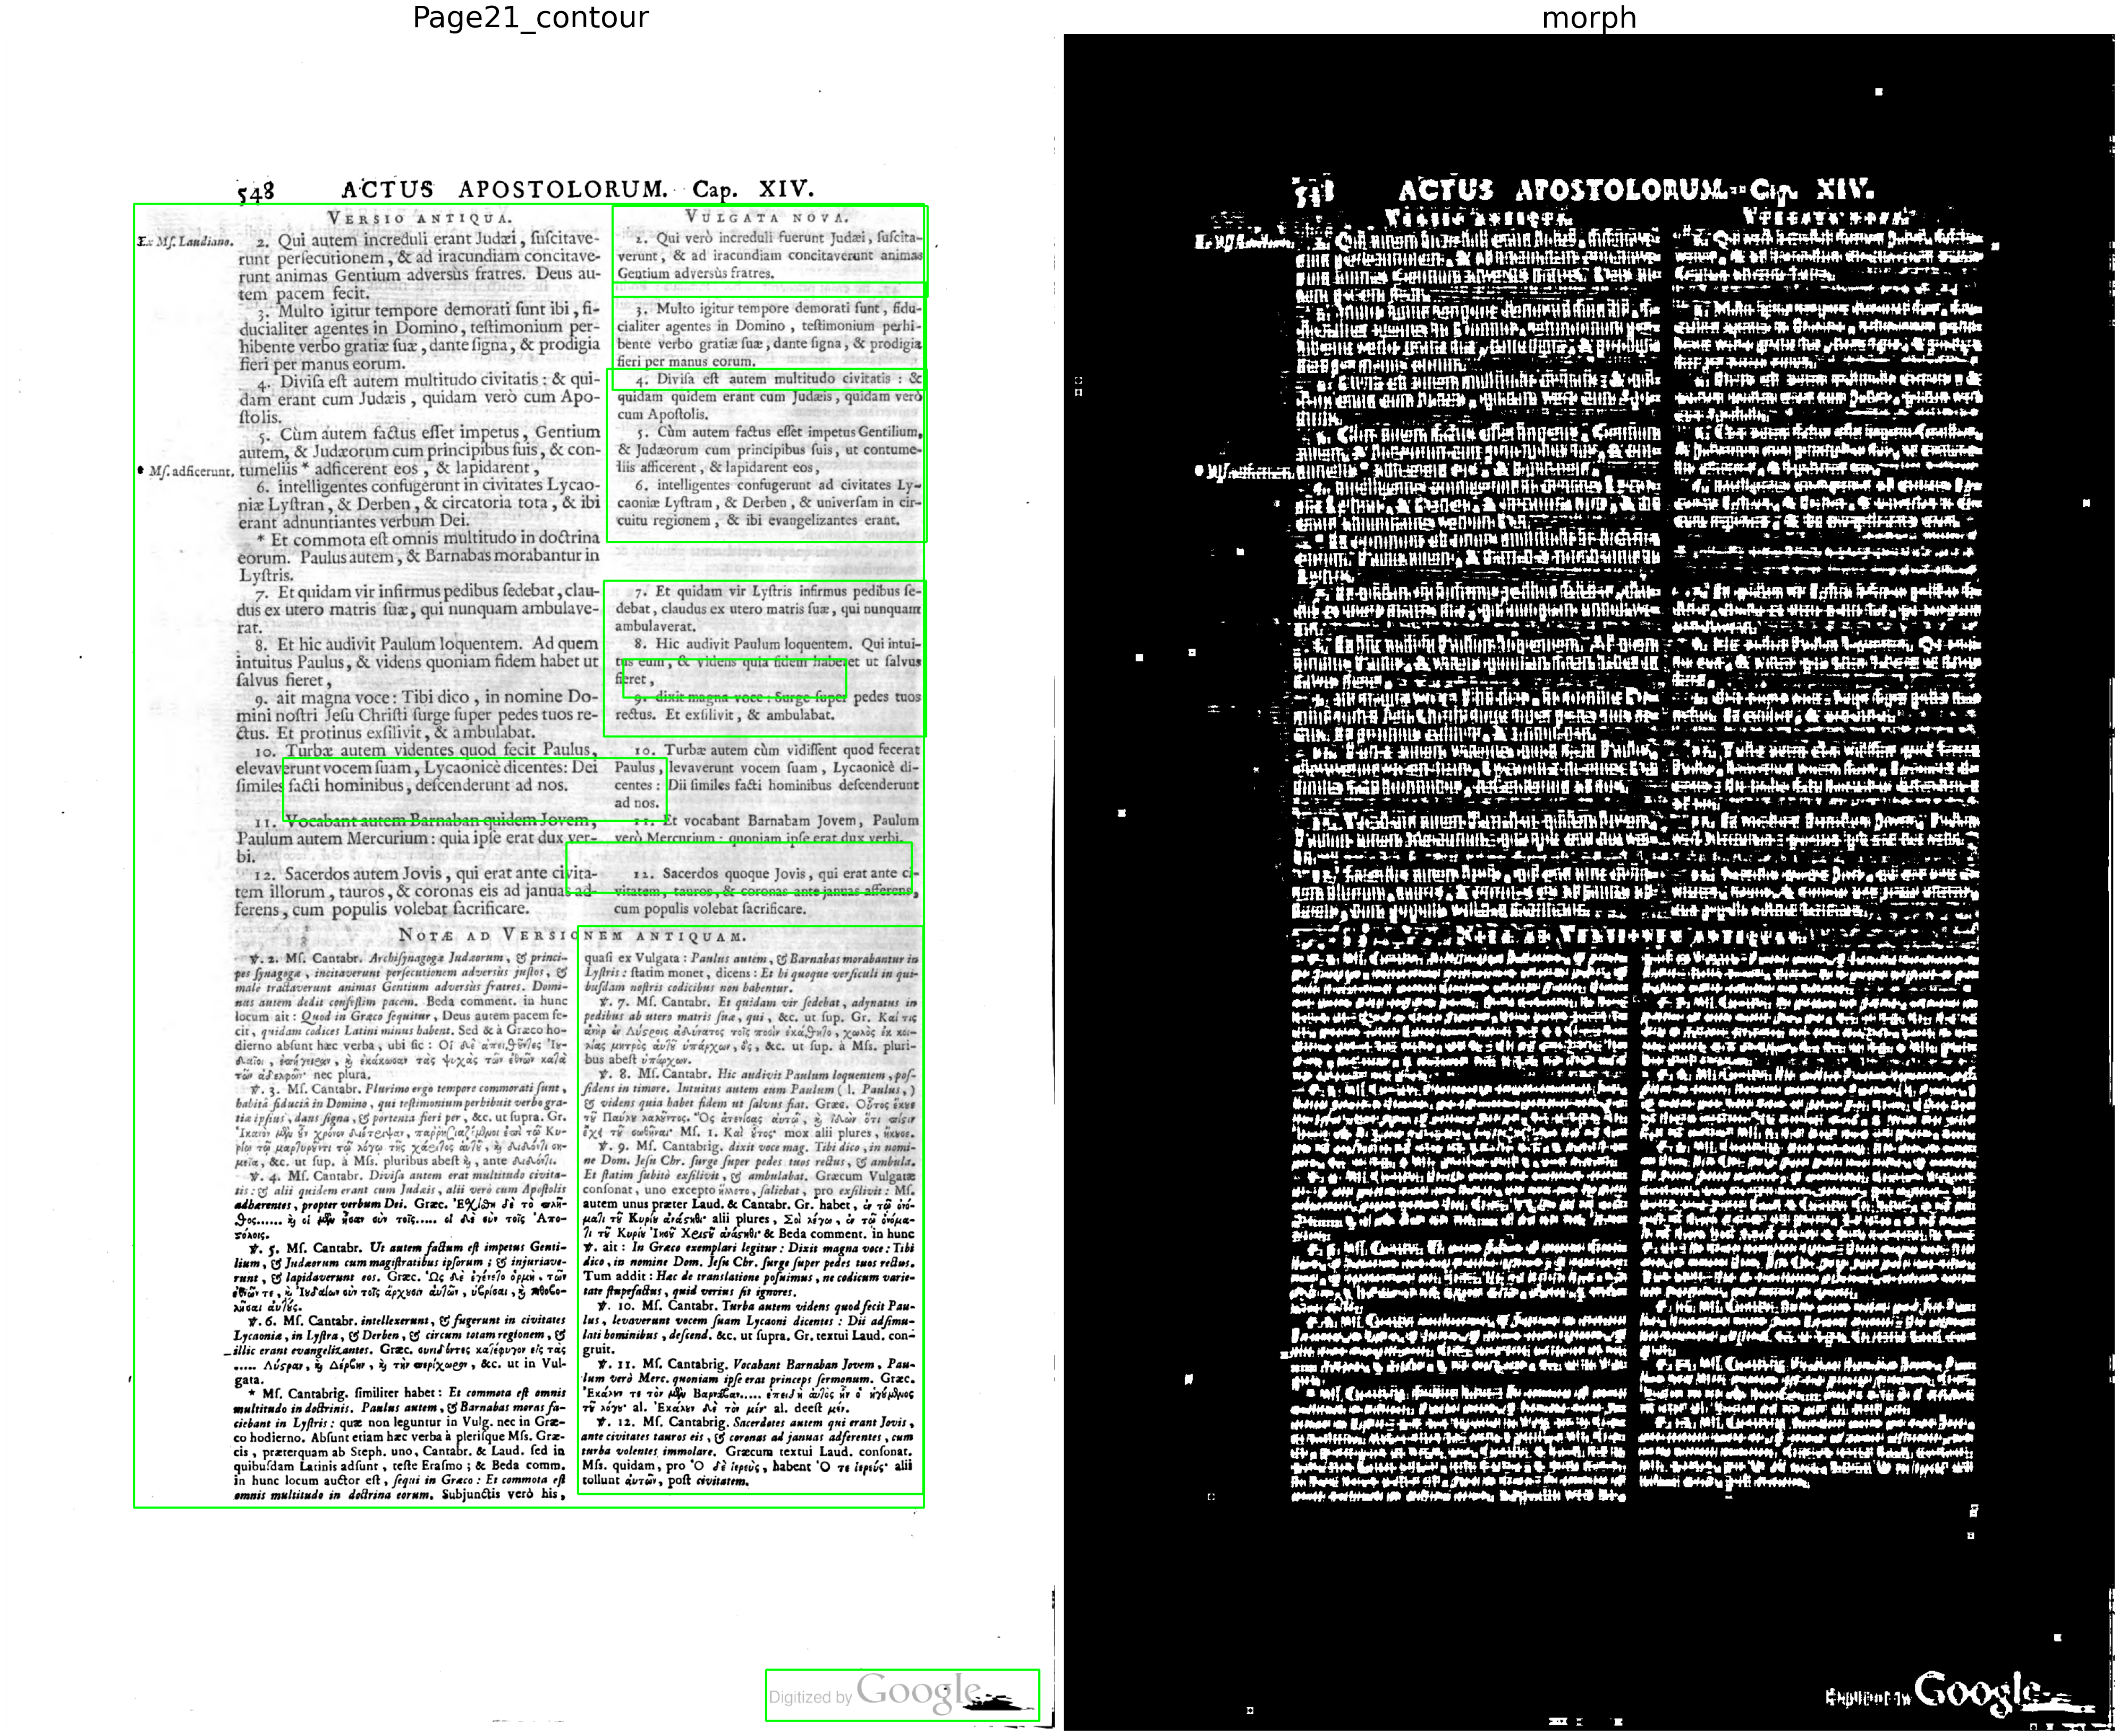

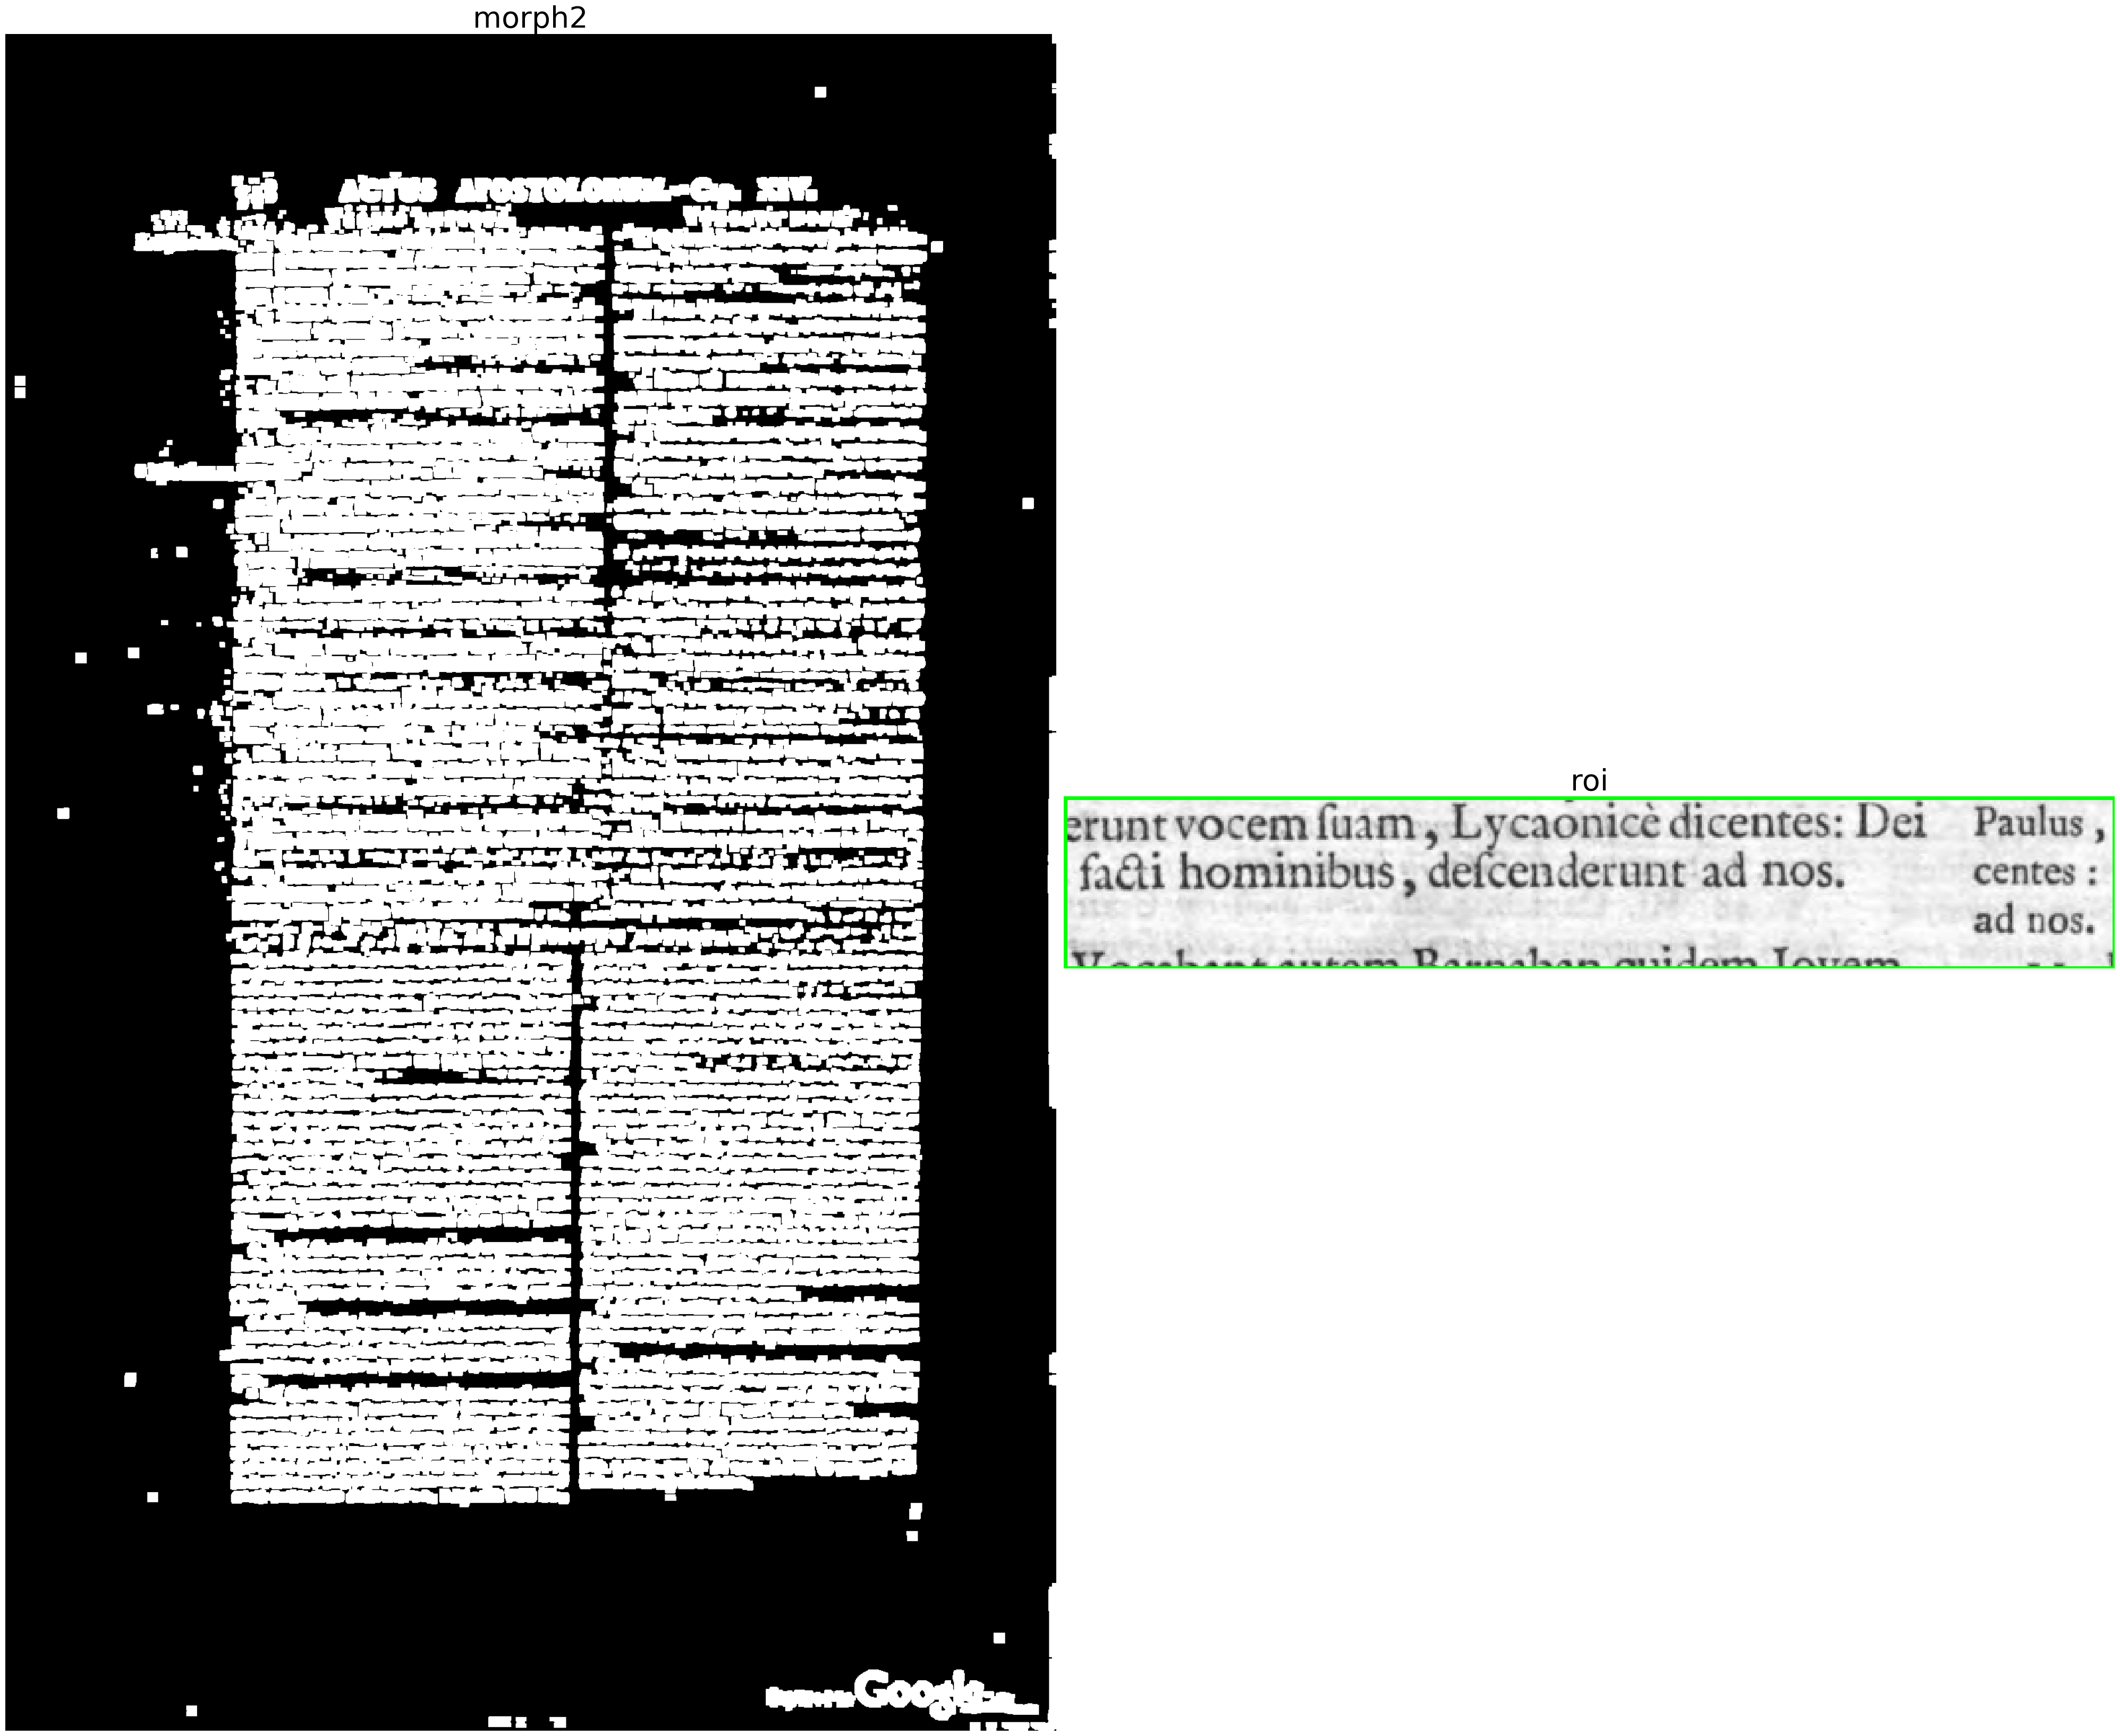

In [ ]:
def affichage(dic): #on affiche les différentes étapes pour y voir ce qu'il se passe
  plt.clf()
  for i, (title, img) in enumerate(dic.items()):
      if i % 2 == 0:
          plt.figure(figsize=(40, 40))
      plt.subplot(1, 2, i % 2 + 1)
      plt.imshow(img, cmap='gray')
      plt.title(title, fontsize=40)
      plt.axis('off')
      if i % 2 == 1 or i == len(dic) - 1:
        plt.tight_layout()
        plt.show()
dic = {"Page21_contour" : page, "morph" : morph ,"morph2" : morph2, "roi" : roi}
affichage(dic)

In [84]:
print(contours[0])

[[[ 580 2353]]

 [[ 580 2354]]

 [[ 607 2354]]

 [[ 607 2353]]]
